<a href="https://colab.research.google.com/github/guidoivetta/attention-mechanisms-as-baseline-for-VQA/blob/main/plantVillage_captioner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## El código usado para preprocesar y entrenar está fuertemente inspirado en [este repo](https://github.com/tangbinh/image-captioning).

Para este modelo fue necesario utilizar el dataset de [Plant Village](https://plantvillage.psu.edu/).

Las anotaciones fueron generadas con el formato de COCO a través de varios scripts, uno de los cuales se muestra a continuación.


In [ ]:
import glob
# All files ending with .txt
data_files_paths = glob.glob("./*.txt")

diseaseNameOrder = []
diseaseNameIdEnd = [0]

print("{\n\"images\": [\n")
i=0
for data_file_path in data_files_paths:
  # print(data_file_path,i)
  with open(data_file_path) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]

  for image_path in lines:
    image_item = "{\n"f'  "file_name": "{image_path}",\n'+f'  "height": 256,\n  "width": 256,\n'f'  "id": {i}\n'"},"
    print(image_item)
    i+=1
  diseaseNameOrder.append(data_file_path)
  diseaseNameIdEnd.append(i)
print("],")

print("\"annotations\": [\n")
i=0
for j in range(len(diseaseNameIdEnd)-1):
  (plant_name, _, diseaseName) = diseaseNameOrder[j][len('./'):][:-len('.txt')].partition("__")
  diseaseName = diseaseName.replace("_", " ")
  # print(plant_name,diseaseName)
  for image_id in range(diseaseNameIdEnd[j],diseaseNameIdEnd[j+1]):
    sampleDescriptions = []
    if(diseaseName == "healthy"):
      sampleDescriptions.append(f"Un {plant_name} saludable.")
      sampleDescriptions.append(f"Una hoja de {plant_name} en buena salud.")
      sampleDescriptions.append(f"Una hoja de {plant_name} en buenas condiciones.")
      sampleDescriptions.append(f"Una saludable hoja de {plant_name}.")
      sampleDescriptions.append(f"Una hoja de {plant_name} sin enfermedades.")
      sampleDescriptions.append(f"Una hoja de {plant_name} perfectamente saludable.")
    else:
      sampleDescriptions.append(f"Una hoja de {plant_name} con {diseaseName}.")
      sampleDescriptions.append(f"Una hoja de {plant_name} en malas condiciones, tiene {diseaseName}.")
      sampleDescriptions.append(f"Una hoja de {plant_name} en mala salud, tiene {diseaseName}.")
      sampleDescriptions.append(f"Un {plant_name} enfermo con {diseaseName}")
    for description in sampleDescriptions:
      annotation_item = "{\n"f'  "image_id": {image_id},\n'+f'  "id": {i},\n'f'  "caption": "{description}"\n'"},"
      print(annotation_item)
      i+=1
print("]\n}")

In [ ]:
!python -m spacy download es 

In [ ]:
!python preprocess.py --data DATA_DIR --dest-dir DEST_DIR

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[2021-11-12 16:30:00] COMMAND: preprocess.py --data DATA_DIR --dest-dir DEST_DIR
[2021-11-12 16:30:00] Arguments: {'seed': 42, 'data': 'DATA_DIR', 'dest_dir': 'DEST_DIR', 'train_image': 'DATA_DIR/images/train', 'valid_image': 'DATA_DIR/images/val', 'test_image': 'DATA_DIR/images/test', 'train_caption': 'DATA_DIR/annotations/captions_train.json', 'valid_caption': 'DATA_DIR/annotations/captions_val.json', 'test_caption': 'DATA_DIR/annotations/captions_test.json', 'image_size': 256, 'crop_size': 224, 'batch_size': 80, 'num_workers': 8, 'threshold': 0, 'num_words': -1}
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
[2021-11-12 16:31:25] Built a source dictionary with 41 words
loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
[2021-11-12 16:32:49] Built a binary dataset for DATA_DIR/annotations/captions_val.json: 

In [ ]:
!python train.py --arch show_attend_tell --data DEST_DIR --save-dir checkpoints_esp/show_attend_tell --log-file logs/show_attend_tell.log

[2021-11-12 16:40:34] COMMAND: train.py --arch show_attend_tell --data DEST_DIR --save-dir checkpoints_esp/show_attend_tell --log-file logs/show_attend_tell.log
[2021-11-12 16:40:34] Arguments: {'seed': 42, 'data': 'DEST_DIR', 'max_tokens': 16000, 'batch_size': 10, 'num_workers': 2, 'arch': 'show_attend_tell', 'max_epoch': 100, 'clip_norm': 5, 'lr': 0.0002, 'momentum': 0.99, 'weight_decay': 0.0, 'lr_shrink': 0.2, 'min_lr': 1e-06, 'log_file': 'logs/show_attend_tell.log', 'save_dir': 'checkpoints_esp/show_attend_tell', 'restore_file': 'checkpoint_last.pt', 'save_interval': 1, 'no_save': False, 'epoch_checkpoints': False, 'embed_dim': 300, 'embed_path': None, 'image_dim': 512, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.4, 'use_attention': 'True'}
[2021-11-12 16:40:34] Loaded a dictionary of 41 words
[2021-11-12 16:40:34] Created a train dataset of 8954 examples
[2021-11-12 16:40:34] Created a validation dataset of 8874 examples
[2021-11-12 16:40:37] Built a model with 4587573 param

In [ ]:
!python getTextCaptionsForMultipleImages.py --checkpoint-path /content/drive/MyDrive/bla_copia/checkpoints_esp/show_attend_tell/checkpoint_best.pt --images-path /content/drive/MyDrive/bla_copia/IMAGES_TO_CAPTION/image

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[2021-11-16 02:22:26] COMMAND: getTextCaptionsForMultipleImages.py --checkpoint-path /content/drive/MyDrive/bla_copia/checkpoints_esp/show_attend_tell/checkpoint_best.pt --images-path /content/drive/MyDrive/bla_copia/IMAGES_TO_CAPTION/image
[2021-11-16 02:22:26] Arguments: {'seed': 42, 'data': 'DEST_DIR', 'max_tokens': 16000, 'batch_size': 10, 'num_workers': 2, 'arch': 'show_attend_tell', 'max_epoch': 100, 'clip_norm': 5, 'lr': 0.0002, 'momentum': 0.99, 'weight_decay': 0.0, 'lr_shrink': 0.2, 'min_lr': 1e-06, 'log_file': None, 'save_dir': 'checkpoints_esp/show_attend_tell', 'restore_file': 'checkpoint_last.pt', 'save_interval': 1, 'no_save': False, 'epoch_checkpoints': False, 'embed_dim': 300, 'embed_path': None, 'image_dim': 512, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.4, 'use_attention': 'T

In [ ]:
!cat /content/drive/MyDrive/bla_copia/hola.txt

una hoja de tomato en mala salud , tiene late blight .
una hoja de tomato en buenas condiciones .
una hoja de pepper_bell en mala salud , tiene bacterial spot .
una hoja de tomato en malas condiciones , tiene tomato mosaic virus .


In [ ]:
!python getCaptionsForOneImage.py --checkpoint-path /content/drive/MyDrive/bla_copia/checkpoints_esp/show_attend_tell/checkpoint_best.pt --images-path /content/drive/MyDrive/bla_copia/IMAGES_TO_CAPTION/image

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[2021-11-15 19:21:35] COMMAND: getCaptionsForOneImage.py --checkpoint-path /content/drive/MyDrive/bla_copia/checkpoints_esp/show_attend_tell/checkpoint_best.pt --images-path /content/drive/MyDrive/bla_copia/IMAGES_TO_CAPTION/image
[2021-11-15 19:21:35] Arguments: {'seed': 42, 'data': 'DEST_DIR', 'max_tokens': 16000, 'batch_size': 10, 'num_workers': 2, 'arch': 'show_attend_tell', 'max_epoch': 100, 'clip_norm': 5, 'lr': 0.0002, 'momentum': 0.99, 'weight_decay': 0.0, 'lr_shrink': 0.2, 'min_lr': 1e-06, 'log_file': None, 'save_dir': 'checkpoints_esp/show_attend_tell', 'restore_file': 'checkpoint_last.pt', 'save_interval': 1, 'no_save': False, 'epoch_checkpoints': False, 'embed_dim': 300, 'embed_path': None, 'image_dim': 512, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.4, 'use_attention': 'True', 'ima

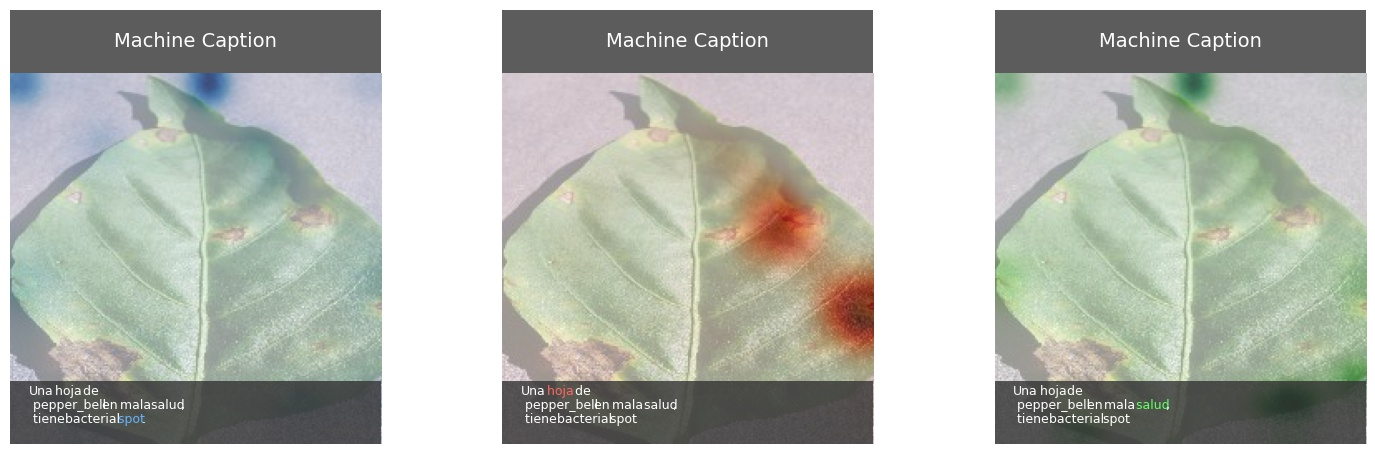

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/bla_copia/IMAGES_TO_CAPTION/image/1_CAPTIONED.jpg') 

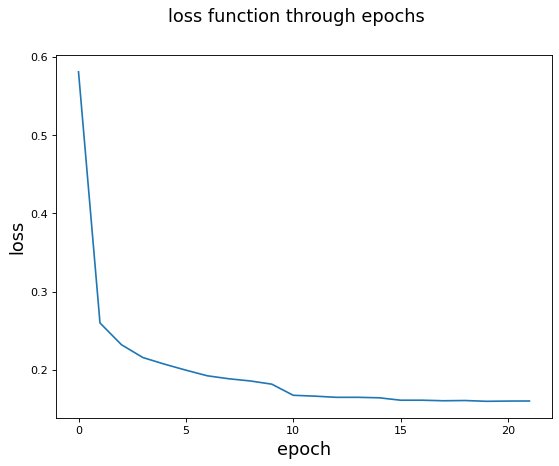

In [ ]:
import matplotlib.pyplot as plt

loss_data = [0.5808, 0.2599, 0.2321, 0.2157, 0.2073, 0.1996, 0.1924, 0.1886, 0.1858, 0.1817, 0.1675, 0.1664, 0.1649, 0.1649, 0.1643, 0.1612, 0.1612, 0.1605, 0.1608, 0.1598, 0.1601, 0.1602]

fig = plt.figure(figsize=(8, 6), dpi=80)
plt.plot(loss_data)
fig.suptitle('loss function through epochs', fontsize=16)
plt.xlabel('epoch', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.show()


## BLEU score para el modelo de captioning en español para distintos n-gramas:

BLEU_unigram = 50.5088

BLEU_bigram = 42.3733

BLEU_3-gram = 36.6993

BLEU_4-gram = 31.5989

<img src="https://i.ibb.co/KNnWrG9/Screenshot-20211119-115834.png" height="600" />


